# Model Knn : Amélioration du model de données DdoS


## 1 Chargement des librairies

In [2]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Librairies
import pandas as pd
import numpy as np
import re

# Graphiques
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import learning_curve


# Machine learning - Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder

# Machine learning - Modèle d'apprentissage supervisé
from sklearn.neighbors import KNeighborsClassifier

# Machine learning - Modèle selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
import pickle
from typing import Tuple

# Machine learning - Métriques d'erreur
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot.metrics as splt
from sklearn.metrics import ConfusionMatrixDisplay
import itertools

## 2 Chargement des fichiers

In [4]:
test = 'https://raw.githubusercontent.com/Marceline37/securit-/main/KDDTest%2B.txt'
train ='https://raw.githubusercontent.com/Marceline37/securit-/main/KDDTrain%2B.txt'

In [5]:
df = pd.read_csv(train)

In [6]:
df1 = pd.read_csv(test)

In [7]:
# Mise en place des noms de colonnnes sur les deux dataframes
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])
df.columns = columns
df1.columns = columns

In [8]:
# Concaténation de df et df1
df = pd.concat([df, df1], ignore_index=True)

In [9]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148511,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148512,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148513,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## 3 Nettoyage des données

In [10]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

In [11]:
df['attack'].value_counts()

normal             77053
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


In [12]:
# Définir les attaques Ddos et les données de trafic normale
ddos = ['Neptune', 'smurf', 'back', 'teardrop', 'apache2', 'processtable', 'mailbomb', 'pod', 'land', 'worm', 'udpstorm']
norm = ['normal']

In [13]:
# Suppression des données non essentiels
def attack_type(row):
    if row['attack'] in ddos:
        return 'ddoS'
    elif row['attack'] in norm:
        return 'normal'
    else:  
        return 'other'

In [14]:
# Application de la fonction sur la colonne attack
df['Label'] = df.apply(attack_type, axis=1)

In [15]:
# Suppression des lignes avec attack_type == 'other'
df = df.drop(df[df['Label'] == 'other'].index)

In [16]:
df['Label'].value_counts()

normal    77053
ddoS       7516
Name: Label, dtype: int64

In [17]:
count_attack = df['attack'].value_counts()
count_attack

normal          77053
smurf            3311
back             1315
teardrop          904
apache2           737
processtable      685
mailbomb          293
pod               242
land               25
worm                2
udpstorm            2
Name: attack, dtype: int64

In [18]:
df_copy =df.copy()

In [19]:
# Renommer les valeurs dans la colonne Label
df = df.fillna(-1).replace({'normal':0, 'ddoS':1})

In [20]:
df['Label'].value_counts()

0    77053
1     7516
Name: Label, dtype: int64

In [21]:
# Suppression des lignes contenant des valeurs manquantes
df = df.dropna()

In [22]:
# Modifier le type de la colonne 'level' en string
df=  df.astype({'level':'str'})

## 4 Preprocessing

In [30]:
# Définir les colonnes de X,y
X = df.drop(columns="Label")
y = df['Label']

In [31]:
X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

In [32]:
y

0         0
2         0
3         0
11        0
15        0
         ..
148509    1
148510    0
148511    0
148512    1
148513    0
Name: Label, Length: 84569, dtype: int64

## 5 Définir le pipeline

In [33]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  

### 5.1 Encodage des données dans le pipeline

In [34]:
# Definir les données numérics et catégorielles
quantitative = [ 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']
qualitative = ['protocol_type', 'service', 'flag','level']# 

In [35]:
transfo_quanti = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='median')),
    ('standard', StandardScaler())])
transfo_quali = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='constant', fill_value='manquant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [36]:
preprocessor = ColumnTransformer(transformers=[
        ('quanti', transfo_quanti , quantitative),
        ('quali', transfo_quali , qualitative)])


In [37]:
# Ajouter l'étape de sélection de caractéristiques
k_best = SelectKBest(mutual_info_classif, k=10)

### 5.2 Activation du pipeline

In [38]:
knn_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', k_best),
        ('knn', KNeighborsClassifier())
    ])

In [39]:
# Sélectionner les meilleures caractéristiques à partir de l'ensemble de formation
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('quanti',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard',
                                                                   StandardScaler())]),
                                                  ['src_bytes', 'dst_bytes',
                                                   'land', 'wrong_fragment',
                                                   'urgent', 'hot',
                                                   'num_failed_logins',
                                                   'logged_in',
                                                   'num_compromised',
                                                   'root_shell', 'su_attempted',
                                                   'num_root',
                                                   'num_file_creations',
                                                   'num_s...
                                                   'dst_host_diff_srv_rate', ...]),
                                                 ('quali',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(fill_value='manquant',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['protocol_type', 'service',
                                                   'flag', 'level'])])),
                ('feature_selection',
                 SelectKBest(score_func=<function mutual_info_classif at 0x7f899792a940>)),
                ('knn', KNeighborsClassifier())])

### 5.3 Paramétrage du grid_search

In [40]:
#Paramètres pour la recherche de grille
param_grid = {'knn__n_neighbors': [3, 5, 7, 9, 11],
            'knn__weights': ['uniform', 'distance'],
             'feature_selection__k':[10,20,30]}

In [44]:
# Initialiser le modèle de recherche d'hyperparamètres
grid_search = GridSearchCV(knn_pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

In [45]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('quanti',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standard',
                                                                                          StandardScaler())]),
                                                                         ['src_bytes',
                                                                          'dst_bytes',
                                                                          'land',
                                                                          'wrong_fragment',
                                                                          'urgent',
                                                                          'hot',
                                                                          'num_failed_logins',
                                                                          'logged_in',
                                                                          'num_compromised',
                                                                          'root_shell',
                                                                          'su_attempted',
                                                                          'num_root'...
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['protocol_type',
                                                                          'service',
                                                                          'flag',
                                                                          'level'])])),
                                       ('feature_selection',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x7f899792a940>)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [10, 20, 30],
                         'knn__n_neighbors': [3, 5, 7, 9, 11],
                         'knn__weights': ['uniform', 'distance']})

In [46]:
0#Résultat du grid_search "Meilleurs paramètres pour le Knn"
print("Best parameters:", grid_search.best_params_)


Best parameters: {'feature_selection__k': 30, 'knn__n_neighbors': 3, 'knn__weights': 'distance'}


In [47]:
print("Best score:", grid_search.best_score_)

Best score: 0.9976794028527085


In [51]:
# Paramètres que j'utilise après avoir fait la recherche du meilleur paramètre
param = {'knn__n_neighbors': [3],
            'knn__weights': ['distance'],
        'feature_selection__k': [30]}

In [52]:
gsc = GridSearchCV(knn_pipeline,
                      param_grid=param,
                      scoring='accuracy',
                      cv=5)

In [53]:
gsc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('quanti',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standard',
                                                                                          StandardScaler())]),
                                                                         ['src_bytes',
                                                                          'dst_bytes',
                                                                          'land',
                                                                          'wrong_fragment',
                                                                          'urgent',
                                                                          'hot',
                                                                          'num_failed_logins',
                                                                          'logged_in',
                                                                          'num_compromised',
                                                                          'root_shell',
                                                                          'su_attempted',
                                                                          'num_root'...
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['protocol_type',
                                                                          'service',
                                                                          'flag',
                                                                          'level'])])),
                                       ('feature_selection',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x7f899792a940>)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'feature_selection__k': [30], 'knn__n_neighbors': [3],
                         'knn__weights': ['distance']},
             scoring='accuracy')

In [54]:
knn_pred = gsc.predict(X_test)

In [55]:
knn_pred

array([0, 0, 0, ..., 0, 0, 0])

## 6 Résultat du model

In [56]:
accuracy = accuracy_score(y_test, knn_pred)

In [57]:
print("L'accuracy est de:",accuracy*100)

L'accuracy est de: 99.79898309093059


## 7 Confusion de matrice et un rapport de classification

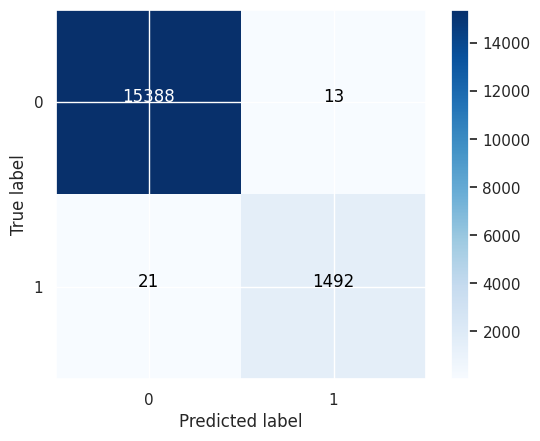

In [62]:
# générer la confusion de matrice
cm = confusion_matrix(y_test, knn_pred)

# TRacer la matrice de confusion sous forme
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Ajouter des étiquettes au tracé
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Ajouter des valeurs dans le graphique
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

In [63]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15401
           1       0.99      0.99      0.99      1513

    accuracy                           1.00     16914
   macro avg       0.99      0.99      0.99     16914
weighted avg       1.00      1.00      1.00     16914

